In [1]:
# create the eda of AllLabels.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv('../Labels/AllLabels.csv')
df

,ClipID,Boredom,Engagement,Confusion,Frustration
0,1100011002.avi,0,2,0,0
1,1100011003.avi,0,2,0,0
2,1100011004.avi,0,3,0,0
3,1100011005.avi,0,3,0,0
4,1100011006.avi,0,3,0,0
...,...,...,...,...,...
8920,9877360164.avi,1,3,0,0
8921,9877360165.avi,0,3,0,0
8922,9877360166.avi,1,3,0,2
8923,9877360168.avi,1,3,1,1


In [36]:
# view in a dataframe value counts for emotion boredom, engagement, frustration, confusion
df['Boredom'].value_counts(), df['Engagement'].value_counts(), df['Frustration'].value_counts(), df['Confusion'].value_counts()



(Boredom
 0    3822
 1    2850
 2    1923
 3     330
 Name: count, dtype: int64,
 Engagement
 2    4422
 3    3987
 1     455
 0      61
 Name: count, dtype: int64,
 Frustration
 0    6887
 1    1613
 2     338
 3      87
 Name: count, dtype: int64,
 Confusion
 0    5951
 1    2133
 2     741
 3     100
 Name: count, dtype: int64)

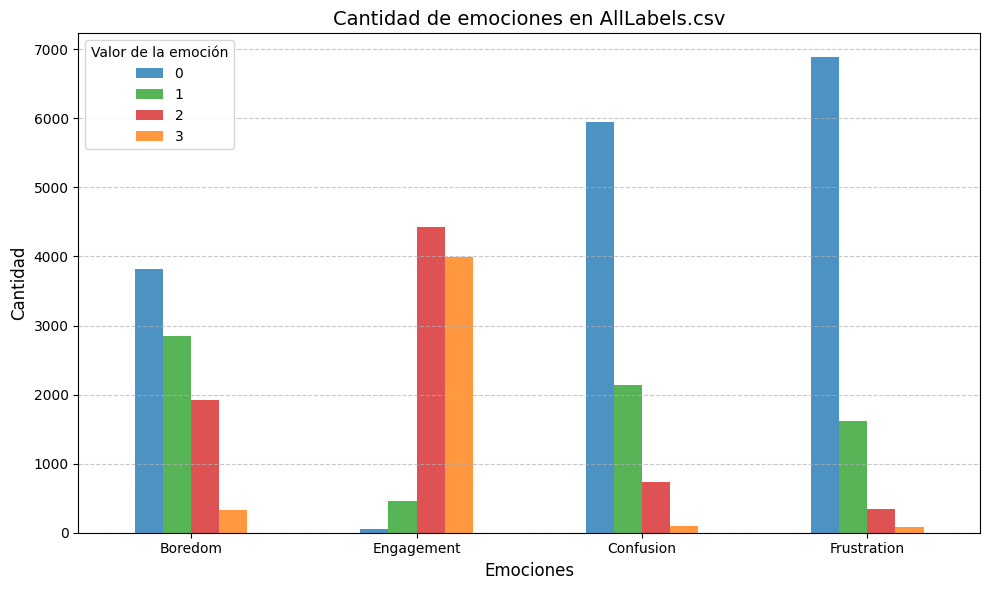

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df contiene las columnas: Boredom, Engagement, Confusion, Frustration
emotion_counts = pd.DataFrame({
    'Boredom': df['Boredom'].value_counts(),
    'Engagement': df['Engagement'].value_counts(),
    'Confusion': df['Confusion'].value_counts(),
    'Frustration': df['Frustration'].value_counts()
}).fillna(0).astype(int)

# Transponer para que las emociones sean filas y las categorías de etiquetas sean columnas
emotion_counts = emotion_counts.T

# Colores definidos para cada emoción
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']  # azul, verde, rojo, naranja

# Crear gráfico de barras agrupadas
emotion_counts.plot(kind='bar', figsize=(10, 6), color=colors, alpha=0.8)

plt.title('Cantidad de emociones en AllLabels.csv', fontsize=14)
plt.xlabel('Emociones', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Valor de la emoción')  # 0, 1, etc.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

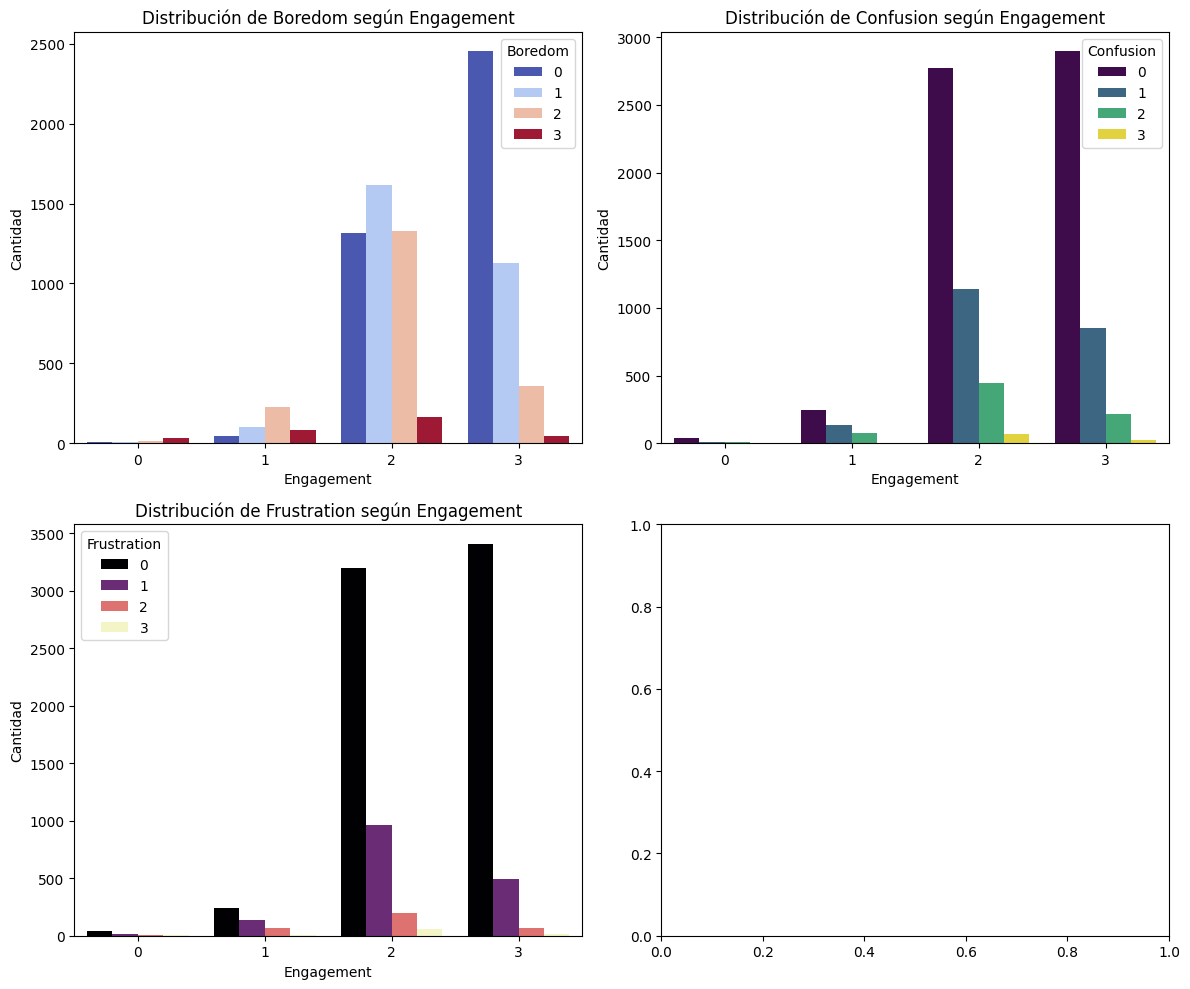

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribución de "Boredom" según los valores de "Engagement"
sns.countplot(data=df, x='Engagement', hue='Boredom', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Distribución de Boredom según Engagement')
axes[0, 0].set_xlabel('Engagement')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].legend(title='Boredom')

# Distribución de "Confusion" según los valores de "Engagement"
sns.countplot(data=df, x='Engagement', hue='Confusion', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribución de Confusion según Engagement')
axes[0, 1].set_xlabel('Engagement')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].legend(title='Confusion')

# Distribución de "Frustration" según los valores de "Engagement"
sns.countplot(data=df, x='Engagement', hue='Frustration', ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Distribución de Frustration según Engagement')
axes[1, 0].set_xlabel('Engagement')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].legend(title='Frustration')

# Ajustar el layout
plt.tight_layout()
plt.show()

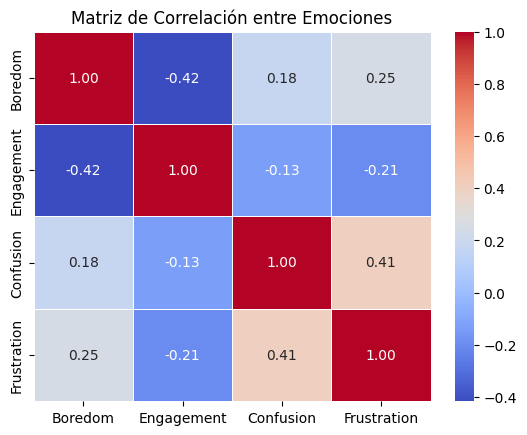

In [24]:
# Crear la matriz de correlación
corr_matrix = df[['Boredom', 'Engagement', 'Confusion', 'Frustration']].corr()

# Heatmap de la correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Emociones')
plt.show()